<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/examples/test_sequence_synchronizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test syncrhonization utils

In [2]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install . 

In [9]:
from optic.dsp.core import finddelay, pnorm
from optic.dsp.synchronization import syncDataSequences
from optic.utils import parameters
from optic.plot import pconst
from optic.models.tx import pamTransmitter, simpleWDMTx
import matplotlib.pyplot as plt
import numpy as np


In [4]:
%load_ext autoreload
%autoreload 2

## Test sequence syncronizer

Calculated delay after synchronization:
Polarization 1: 0 samples
Polarization 2: 0 samples
Original signal length: 8000 samples
Delayed repeated signal length: 183668 samples
Synchronized signal length: 183668 samples
Synchronized symbols length: 91835 symbols


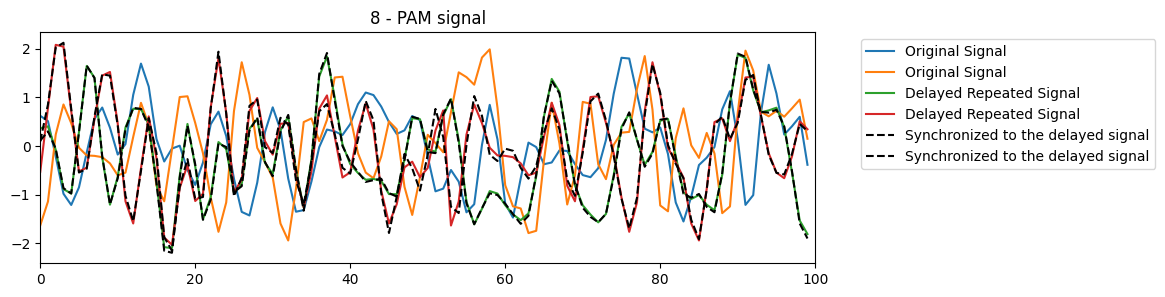

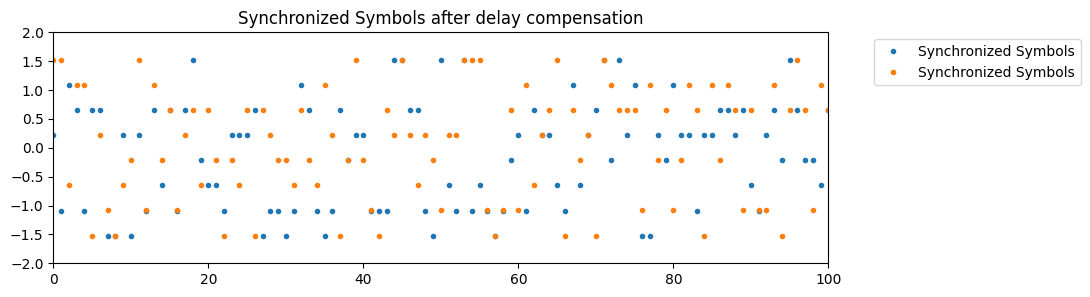

In [5]:
# generate test signal
paramTx = parameters()
paramTx.M = 8
paramTx.SpS = 2
paramTx.nBits = 12000
paramTx.pulseType = 'rrc'
paramTx.pulseRollOff = 0.001
paramTx.nFilterTaps = 1024
paramTx.seed = 123
paramTx.nPolModes = 2
signal, symbols = pamTransmitter(paramTx)
signal = pnorm(signal**2 - np.mean(signal**2, axis=0))

if paramTx.nPolModes == 1:
    signal = signal.reshape(-1,1)

# repeat signal
signal_rep = np.tile(signal, (23, 1))

# add delay to repeated signal
delay = [179, 53]  # samples
for ind in range(signal_rep.shape[1]):
    signal_rep[:,ind] = np.roll(signal_rep[:,ind], delay[ind], axis=0)

# crop length
signal_rep = signal_rep[0:-332,:]  

# synchronize sequences
param = parameters()
param.SpS = paramTx.SpS
param.pulseType = paramTx.pulseType
param.rollOff = paramTx.pulseRollOff
param.reference = 'symbols'
param.M = paramTx.M
param.constType = 'pam'
param.syncMode = 'amp'
signal_sync, symbols_sync1 = syncDataSequences(signal_rep, symbols, param)

plt.figure(figsize=(10,3))
plt.plot(signal[0:50*param.SpS], '-', markersize=3, label='Original Signal')
plt.plot(signal_rep[0:50*param.SpS], '-', markersize=3, label='Delayed Repeated Signal')
plt.plot(signal_sync[0:50*param.SpS], 'k--', markersize=3, label='Synchronized to the delayed signal')
plt.xlim(0, 50*param.SpS)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'{param.M} - PAM signal')

plt.figure(figsize=(10,3))
plt.plot(pnorm(symbols_sync1), '.', markersize=6, label='Synchronized Symbols')
plt.xlim(0, 100)
plt.ylim(-2, 2)
plt.title('Synchronized Symbols after delay compensation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# print estimated delays
print(f'Calculated delay after synchronization:')
for ind in range(signal.shape[1]):
    print(f'Polarization {ind+1}: {finddelay(signal_rep[:, ind], signal_sync[:, ind])} samples')

# print lengths
print(f'Original signal length: {len(signal)} samples')
print(f'Delayed repeated signal length: {len(signal_rep)} samples')
print(f'Synchronized signal length: {len(signal_sync)} samples')
print(f'Synchronized symbols length: {len(symbols_sync1)} symbols')


Calculated delay after synchronization:
Polarization 1: 0 samples
Polarization 2: 0 samples
Original signal length: 8000 samples
Delayed repeated signal length: 183667 samples
Synchronized signal length: 183667 samples
Synchronized symbols length: 91833 symbols


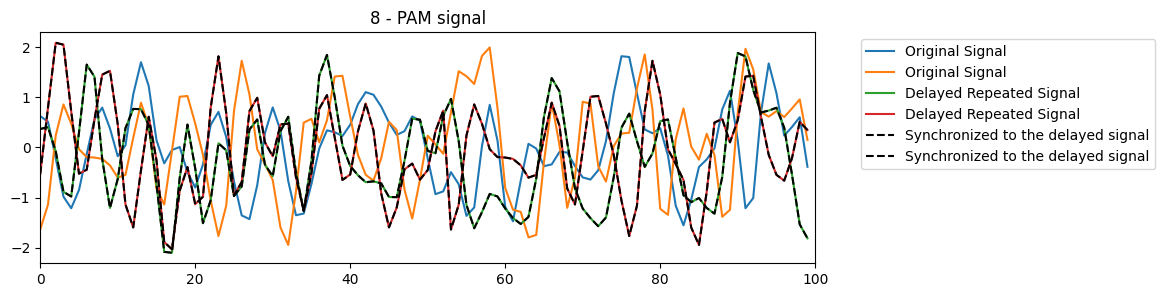

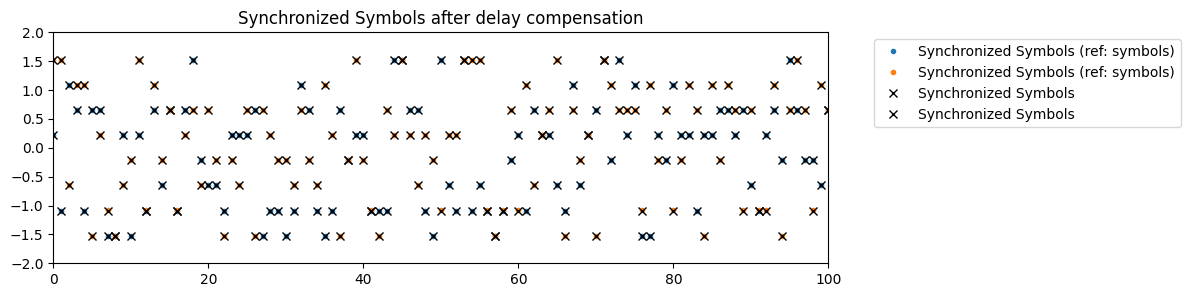

In [6]:
# generate test signal
paramTx = parameters()
paramTx.M = 8
paramTx.SpS = 2
paramTx.nBits = 12000
paramTx.pulseType = 'rrc'
paramTx.pulseRollOff = 0.001
paramTx.nFilterTaps = 1023
paramTx.seed = 123
paramTx.nPolModes = 2
signal, symbols = pamTransmitter(paramTx)
signal = pnorm(signal**2 - np.mean(signal**2, axis=0))

if paramTx.nPolModes == 1:
    signal = signal.reshape(-1,1)

# repeat signal
signal_rep = np.tile(signal, (23, 1))

# add delay to repeated signal
delay = [179, 53]  # samples
for ind in range(signal_rep.shape[1]):
    signal_rep[:,ind] = np.roll(signal_rep[:,ind], delay[ind], axis=0)

# crop length
signal_rep = signal_rep[0:-333,:]  

# synchronize sequences
param = parameters()
param.SpS = paramTx.SpS
param.pulseType = paramTx.pulseType
param.rollOff = paramTx.pulseRollOff
param.reference = 'signal'
param.M = paramTx.M
param.constType = 'pam'
signal_sync, symbols_sync2 = syncDataSequences(signal_rep, signal, param)

plt.figure(figsize=(10,3))
plt.plot(signal[0:50*param.SpS], '-', markersize=3, label='Original Signal')
plt.plot(signal_rep[0:50*param.SpS], '-', markersize=3, label='Delayed Repeated Signal')
plt.plot(signal_sync[0:50*param.SpS], 'k--', markersize=3, label='Synchronized to the delayed signal')
plt.xlim(0, 50*param.SpS)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'{param.M} - PAM signal')

plt.figure(figsize=(10,3))
plt.plot(pnorm(symbols_sync1), '.', markersize=6, label='Synchronized Symbols (ref: symbols)')
plt.plot(pnorm(symbols_sync2), 'kx', markersize=6, label='Synchronized Symbols')
plt.xlim(0, 100)
plt.ylim(-2, 2)
plt.title('Synchronized Symbols after delay compensation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# print estimated delays
print(f'Calculated delay after synchronization:')
for ind in range(signal.shape[1]):
    print(f'Polarization {ind+1}: {finddelay(signal_rep[:, ind], signal_sync[:, ind])} samples')

# print lengths
print(f'Original signal length: {len(signal)} samples')
print(f'Delayed repeated signal length: {len(signal_rep)} samples')
print(f'Synchronized signal length: {len(signal_sync)} samples')
print(f'Synchronized symbols length: {len(symbols_sync2)} symbols')

  0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, '16 - QAM signal')

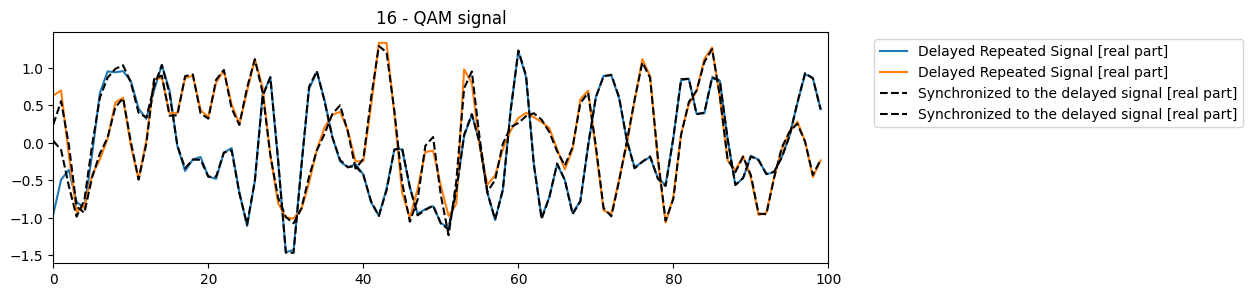

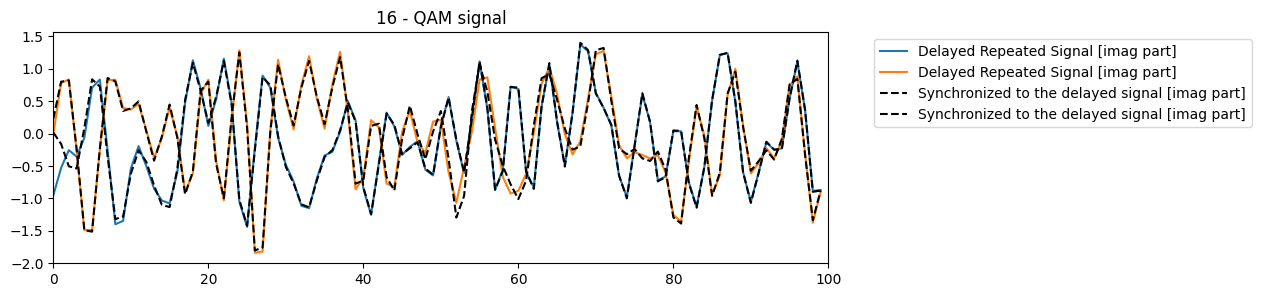

In [35]:
# Transmitter parameters:
paramTx = parameters()
paramTx.M   = 16  # order of the modulation format
paramTx.SpS = 2  # samples per symbol
paramTx.pulseType = 'rrc' # pulse shaping filter
paramTx.nFilterTaps = 1025 # number of pulse shaping filter coefficients
paramTx.pulseRollOff = 0.01 # RRC rolloff
paramTx.powerPerChannel = -2 # power per WDM channel [dBm]
paramTx.nChannels = 1 # number of WDM channels
paramTx.laserLinewidth = 0 # laser linewidth in Hz
paramTx.nPolModes = 2  # number of signal modes [2 for polarization multiplexed signals]
paramTx.nBits = int(np.log2(paramTx.M)*2e3) # total number of bits per polarization
paramTx.seed = 123 # random seed for bit generation
paramTx.mzmScale = 0.25

# generate WDM signal
signal, symbTx, paramTx = simpleWDMTx(paramTx)


if paramTx.nPolModes == 1:
    signal = signal.reshape(-1,1)

# repeat signal
signal_rep = np.tile(signal, (23, 1))

# add delay to repeated signal
delay = [179, 53]  # samples
for ind in range(signal_rep.shape[1]):
    signal_rep[:,ind] = np.roll(signal_rep[:,ind], delay[ind], axis=0)

# crop length
signal_rep = pnorm(signal_rep[0:-333,:])

# rotate constellation
signal_rep = np.exp(1j*np.pi/2) * signal_rep.conj( )

# synchronize sequences
param = parameters()
param.SpS = paramTx.SpS
param.pulseType = paramTx.pulseType
param.rollOff = paramTx.pulseRollOff
param.reference = 'symbols'
param.M = paramTx.M
param.constType = 'qam'
param.syncMode = 'real'
signal_sync, symbols_sync2 = syncDataSequences(pnorm(signal_rep), pnorm(symbTx[:,:,0]), param)

# signal_rep = signal_rep * np.exp(-1j*np.pi/2*0)  # compensate rotation after synchronization

plt.figure(figsize=(10,3))
plt.plot(signal_rep[0:50*param.SpS].real, '-', markersize=3, label='Delayed Repeated Signal [real part]')
plt.plot(signal_sync[0:50*param.SpS].real, 'k--', markersize=3, label='Synchronized to the delayed signal [real part]')
plt.xlim(0, 50*param.SpS)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'{param.M} - QAM signal')

plt.figure(figsize=(10,3))
plt.plot(signal_rep[0:50*param.SpS].imag, '-', markersize=3, label='Delayed Repeated Signal [imag part]')
plt.plot(signal_sync[0:50*param.SpS].imag, 'k--', markersize=3, label='Synchronized to the delayed signal [imag part]')
plt.xlim(0, 50*param.SpS)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f'{param.M} - QAM signal')